**1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?**


* The fundamental idea of ensemble techniques is:
  * Combine multiple weak or base models to create a stronger, more accurate overall model.
  * Instead of relying on a single model (which might be biased or unstable), ensembles aggregate the predictions from several models to:
  * Reduce variance (overfitting),Reduce bias (underfitting), and Improve overall generalization on unseen data.
* Common ensemble methods include:
  * Bagging (Bootstrap Aggregating) → e.g., Random Forest
  * Boosting → e.g., AdaBoost, Gradient Boosting, XGBoost
  * Stacking → combining different model types via a meta-model
* Bagging (Bootstrap Aggregating)
  * Train several models independently on random subsets of the training data (sampled with replacement), then combine their outputs (usually by voting or averaging).
  * Reduce variance and prevent overfitting.
  * Create multiple bootstrap samples from the training data.
  * Train a base learner (like a Decision Tree) on each sample.
* Combine all model predictions:
  * For classification → majority vote.
  * For regression → average.
  * Each model is trained independently; no model tries to correct the mistakes of another.
* Example:
  * Random Forest = Bagging + Random Feature Selection
* Boosting
  * Train models sequentially, where each new model focuses on the errors made by the previous ones.
  * Reduce bias and build a strong learner from a series of weak learners.
  * Start with a weak model (like a shallow decision tree).
  * Increase the weight (importance) of misclassified samples.
  * Train the next model to better predict these “hard” cases.
  * Combine all models with weighted voting (stronger ones get higher weights).
  * Models are dependent — each new one learns from the residuals (errors) of the previous.
* Examples:
  * AdaBoost, Gradient Boosting, XGBoost, LightGBM

**2.  Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process?**

* The Problem with a Single Decision Tree A single Decision Tree tends to:
  * Learn the training data too well (especially deep trees).
  * Capture noise and outliers instead of general patterns.
  * Therefore, it often overfits, leading to poor performance on unseen data.

* How a Random Forest Reduces Overfitting
  * A Random Forest is an ensemble of many decision trees, each trained slightly differently.
* It reduces overfitting through two key ideas:
* Bootstrap Sampling (Bagging):
  * Each tree is trained on a random subset of the training data (sampled with replacement).
  * So, every tree sees a slightly different view of the dataset.
  * This causes the trees to make uncorrelated errors.
* Random Feature Selection:
  * At each tree split, the model considers only a random subset of features, not all of them.
  * This ensures trees are diverse — they don’t all rely on the same dominant features.
* After training, predictions from all trees are aggregated:
  * Classification: majority vote
  * Regression: average prediction
* Two Key Hyperparameters That Control Overfitting:
  * n_estimators -   Number of trees in the forest- More trees →   better averaging → reduces variance (though too many may increase training time).
  * max_features-   Number of features considered at each split
Smaller max_features →  higher tree diversity → lower correlation → less overfitting.

**3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case?**

* Stacking (short for stacked generalization) is an ensemble method that:
  * Combines multiple different models (base learners) and uses another model (called a meta-learner) to learn how to best combine their predictions.
  * So instead of simply averaging or voting (like in bagging), stacking actually learns how to combine the base models optimally.

* How Stacking Works (Step-by-Step)
* Train Base Learners (Level-0 models):
  * Multiple diverse models are trained on the same training data.
  * Example: Logistic Regression, Decision Tree, SVM, Random Forest, etc.
* Generate Meta-Features:
  * Each base model makes predictions on the validation set (or via cross-validation).
  * These predictions become new features — often called meta-features.
* Train a Meta-Learner (Level-1 model):
  * The meta-model learns to combine the base model predictions to make the final output.
  * Common meta-learners: Logistic Regression, Gradient Boosting, etc.
  * Final Prediction = Meta-learner’s output based on base learners’ predictions.
* How Stacking Differs from Bagging & Boosting:
* Bagging:
   * Same type (e.g., many decision trees)
   * Parallel (independent)
   * Simple voting or averaging
   * Reduce variance, Random Forest
* Boosting:
  * Same type (e.g., shallow trees)
  * Sequential (each corrects previous)
  * Weighted sum (based on performance)
  * Reduce bias, AdaBoost, XGBoost
* Stacking:
  * Different types (e.g., tree + SVM + NN)
  * Parallel (base models) + meta-model learns combination
  * Learned combination (via meta-learner)
  * Leverage model diversity for best prediction
  * StackingClassifier / StackingRegressor
* Simple Example Use Case
* Scenario: Predict whether a customer will buy a product (binary classification).
* Base models:
  * Logistic Regression (good for linear patterns)
  * Random Forest (good for non-linear patterns)
  * XGBoost (good for complex interactions)
* Meta-model:
  * Logistic Regression that takes predictions from the above models and learns how to weigh each one optimally.
  * This approach often yields higher accuracy than any single model because:
  * Each model captures different aspects of the data.
  * The meta-learner learns how to blend them effectively.

**4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**

* In a Random Forest, each decision tree is trained on a bootstrap sample — a random subset of the training data drawn with replacement.
* This means that on average, about one-third (≈ 33%) of the training samples are not included in the bootstrap sample for that tree.
* These unused samples are called Out-of-Bag (OOB) samples.
* The OOB Score measures how well the Random Forest predicts these unseen (OOB) samples.
* How It Works
   * When each tree is trained, it only sees its bootstrap sample.
   * For every training instance, there will be several trees that did not see that instance (it’s “OOB” for them).
   * The model predicts that instance’s label using only those trees where it was OOB.
   * The average accuracy (or other metric) of these predictions across all training samples = OOB Score.
* Why the OOB Score Is Useful:
* 1. Acts as Built-in Cross-Validation
   * The OOB samples effectively serve as a validation set.
   * This means you don’t need to manually split your data into training and validation sets.
* 2. Saves Data
   * All data points are used for both training (in some trees) and validation (in others).
   * No data is wasted.
* 3. Provides an Unbiased Performance Estimate
  * Since each OOB sample is predicted by trees that never saw it during training, it gives a reliable estimate of how the model will perform on unseen data.

**5. Compare AdaBoost and Gradient Boosting in terms of:**

**● How they handle errors from weak learners**

**● Weight adjustment mechanism**

**● Typical use cases**

* 1. Core Idea of Both
  * Both AdaBoost and Gradient Boosting are boosting methods, meaning:
  * They build an ensemble sequentially, where each new weak learner focuses on correcting the errors made by the previous ones.
  * However, they differ in how they handle and correct these errors.
* AdaBoost (Adaptive Boosting):
   * Focuses on misclassified samples. Each new weak learner pays more attention to samples that previous learners got wrong.
   * Assigns weights to data points.Misclassified samples get higher weights, so the next learner focuses more on them.
   * Typically uses exponential loss, making it sensitive to outliers.
   * Final model = weighted sum of weak learners based on their accuracy.
   * Emphasizes “re-weighting samples”
   * - Simple classification tasks  - When interpretability and speed are important - Less prone to overfitting with few weak learners.
   * More sensitive (because of exponential weighting).
* Gradient Boosting:
  * Focuses on residual errors (the difference between actual and predicted values). Each new model tries to minimize the loss function of the ensemble.
  * Does not adjust sample weights directly.Instead, it computes the negative gradient (residuals) of the loss function and fits the next model to those residuals.
  * Can use any differentiable loss function (e.g., MSE for regression, log loss for classification).
  * Final model = cumulative sum of weak learners scaled by a learning rate.
  * Emphasizes “gradient descent in function space.”
  * - Complex regression/classification tasks- Large datasets- When high predictive power is needed (e.g., XGBoost, LightGBM)
  * More robust (due to flexible loss optimization).
* Example Use Cases
* AdaBoost
   * Spam detection
   * Customer churn (simple classification)
   * Credit scoring (when data is small to medium-sized)
* Gradient Boosting
   * Predicting house prices
   * Fraud detection
   * Complex tabular data (using XGBoost, LightGBM, CatBoost)

**6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables?**

* Unlike most other gradient boosting algorithms (like XGBoost or LightGBM), which require manual encoding of categorical features (like one-hot or label encoding),CatBoost can handle categorical variables natively.
* It does this through a smart, statistically robust encoding method called “Ordered Target Statistics” (or Ordered Encoding) — which avoids target leakage and overfitting.
* How CatBoost Handles Categorical Variables
* Let’s say you have a categorical feature like:
  * City = [Chennai, Delhi, Mumbai, Chennai, ...] and a target variable (e.g., Purchase = 0 or 1).
* Step 1: Convert Categorical Features to Numeric via Target Statistics
   * CatBoost replaces each categorical value with an encoded numeric value based on the target statistics (like the mean target value for that category).
   * Example:
      * City	Purchase (Target)	Encoded Value (mean of target) Chennai	1	0.75 Delhi	0	0.40 Mumbai	1	0.65 But here’s the catch
      * If you just compute these means directly, you’ll leak target info from the full dataset → target leakage. So CatBoost introduces a unique fix.
* Step 2: Use Ordered Encoding to Prevent Target Leakage
    * CatBoost encodes each sample only using data from previous samples (in a random permutation order).
    * When encoding the i-th sample, it only uses target statistics from samples before it.
    * This ensures that no future information is used (like in a real training scenario).
    * This approach mimics online learning — the model only sees past data while encoding.
* Step 3: Combine with Other Techniques
   * CatBoost can also handle combinations of categorical features automatically (e.g., City + DeviceType).
   * It uses efficient hashing to manage high-cardinality features.
   * It includes built-in regularization to reduce overfitting during encoding.
* Why This Is Powerful
     * No need for one-hot encoding or label encoding
     * Prevents target leakage automatically
     * Works efficiently even with high-cardinality categorical variables
     * Improves generalization and reduces overfitting
     * Speeds up preprocessing pipeline — just feed the raw categorical features directly!

7.KNN Classifier Assignment: Wine Dataset Analysis with Optimization

Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_wine()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

#2.Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#3.Train KNN (K=5) Without Scaling
# Initialize and train model
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)

# Predictions
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluation
print("🔹 Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

#4.Apply StandardScaler and Retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train again
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predictions
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluation
print("🔹 With StandardScaler:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

#Use GridSearchCV for Optimization
#We’ll tune:K values: 1 → 20
#Distance metric: Euclidean (p=2) and Manhattan (p=1)

param_grid = {
    'n_neighbors': range(1, 21),
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("🔹 Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

#Train Optimized KNN and Compare Results
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("🔹 Optimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Feature shape: (178, 13)
Target shape: (178,)
🔹 Without Scaling:
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

🔹 With StandardScaler:
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

🔹 Best Parameters: {'n_neighbors': 4, 'p': 1}
Best CV Accuracy: 0.9756666666666666
🔹 Optimiz

8. PCA + KNN with Variance Analysis and Visualization

Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Feature shape: (569, 30)
Target shape: (569,)


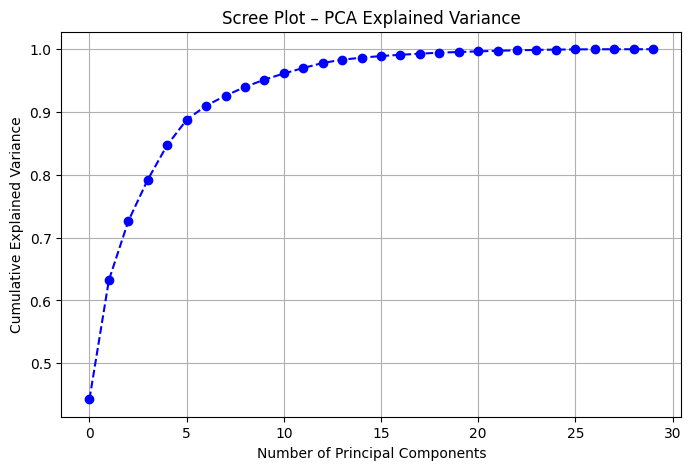

Original shape: (569, 30)
Reduced shape: (569, 10)
Accuracy (Original Data): 0.9707602339181286
Accuracy (PCA Data): 0.9473684210526315


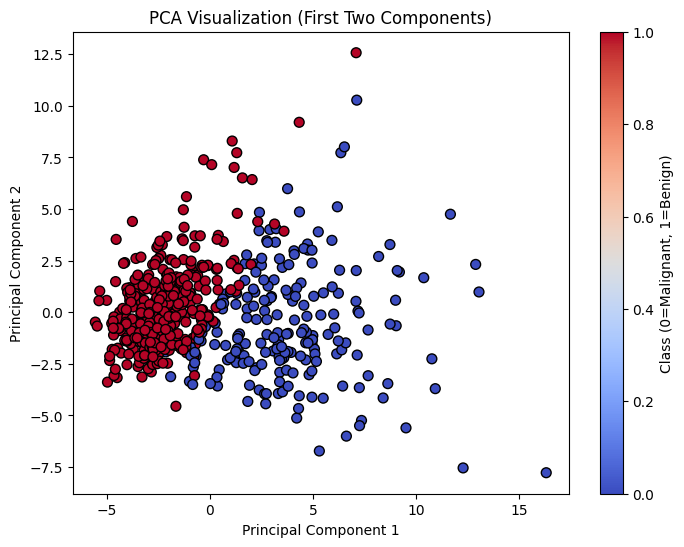

In [2]:
#1.Import Libraries and Load Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

#2.Apply PCA and Plot Scree Plot (Explained Variance Ratio)
#Before applying PCA, always scale the data, because PCA is sensitive to feature magnitude.

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot – PCA Explained Variance")
plt.grid(True)
plt.show()

#3.Retain 95% Variance and Transform Dataset
# PCA to retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

#4.Train KNN on Original and PCA-Transformed Data
#(a) Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

#(b) KNN on Original Data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("Accuracy (Original Data):", acc_orig)

#(c) KNN on PCA-Reduced Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy (PCA Data):", acc_pca)

#5.Visualize the First Two Principal Components
#We’ll use the first two principal components to create a 2D scatter plot, coloring points by class (benign/malignant).

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (First Two Components)")
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()

9. KNN Regressor with Distance Metrics and K-Value Analysis

Task:
1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Train shape: (350, 10)  Test shape: (150, 10)
🔹 MSE (Euclidean, K=5): 4803.91
🔹 MSE (Manhattan, K=5): 5210.23


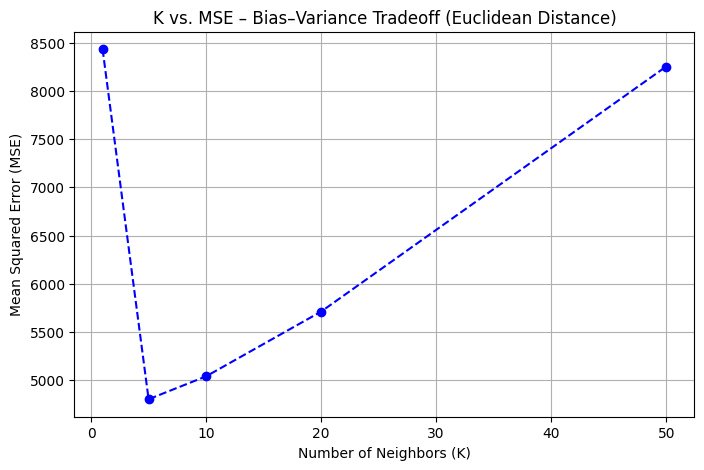

In [3]:
#1.Generate Synthetic Regression Dataset
#We’ll use make_regression() from sklearn.datasets.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

#2.Train KNN Regressor with Euclidean and Manhattan Distance (K=5)
# Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("🔹 MSE (Euclidean, K=5):", round(mse_euclidean, 2))
print("🔹 MSE (Manhattan, K=5):", round(mse_manhattan, 2))

#3.K vs. MSE Analysis (Bias–Variance Tradeoff)
#We’ll vary K = [1, 5, 10, 20, 50] using Euclidean distance for clarity,and plot MSE vs. K to observe the tradeoff.

k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("K vs. MSE – Bias–Variance Tradeoff (Euclidean Distance)")
plt.grid(True)
plt.show()

10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                    

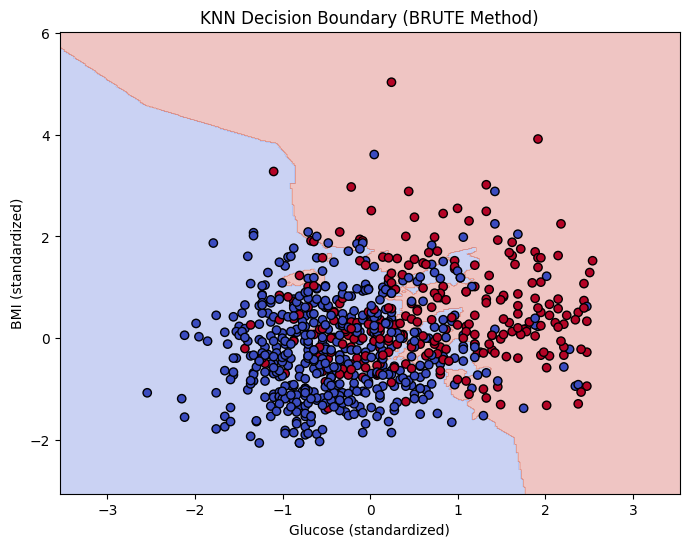

In [5]:
#1.Load Dataset and Handle Missing Values
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
print(df.head())
print("\nMissing values before imputation:\n", df.isnull().sum())

#2.Replace Zeroes with NaN and Apply KNN Imputer
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("\nMissing values before imputation:\n", df.isna().sum())

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nMissing values after imputation:\n", df_imputed.isna().sum())

#3. Split Data and Scale Features
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#4️.Train and Compare KNN Methods
#We’ll compare algorithm = 'brute', 'kd_tree', and 'ball_tree'.

methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[method] = {'Accuracy': acc, 'Time': train_time}

# Show results
results_df = pd.DataFrame(results).T
print("\n🔹 Performance Comparison:\n", results_df)

#5️.Choose Best Method and Plot Decision Boundary
#We’ll select 2 most important features (say: Glucose and BMI) for visualization.

# Select top 2 features
X_vis = df_imputed[['Glucose', 'BMI']].values
y_vis = df_imputed['Outcome']

# Scale data
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(X_vis)

# Split for visualization
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.3, random_state=42, stratify=y_vis
)

# Train best method (choose based on accuracy)
best_method = results_df['Accuracy'].idxmax()
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train_v, y_train_v)

# Plot decision boundary
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.title(f"KNN Decision Boundary ({best_method.upper()} Method)")
plt.show()
